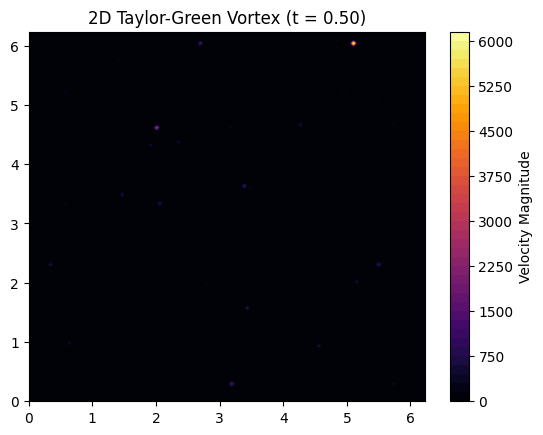

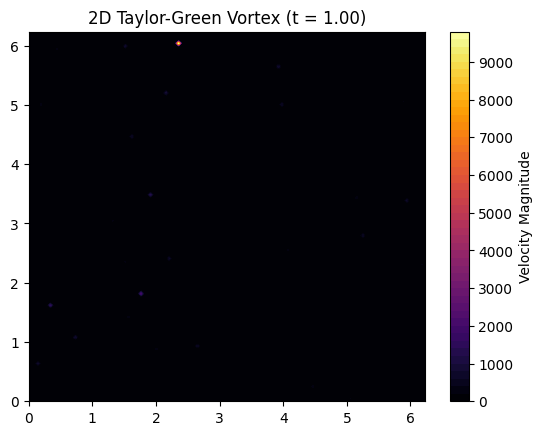

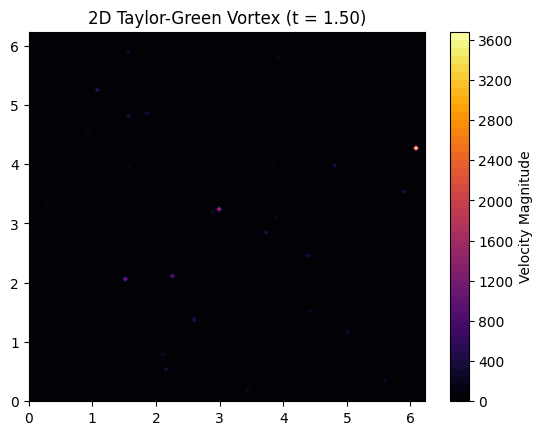

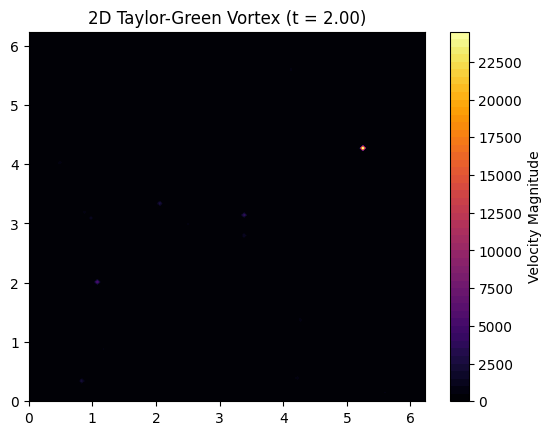

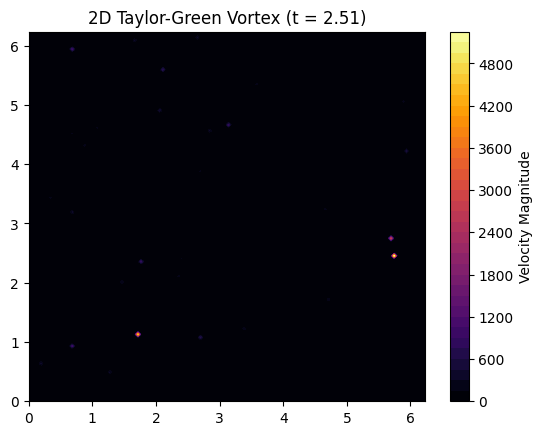

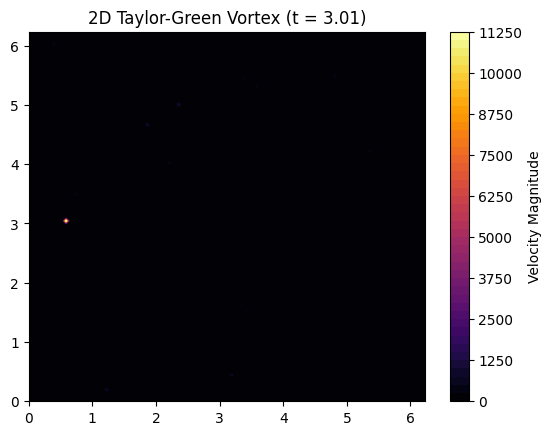

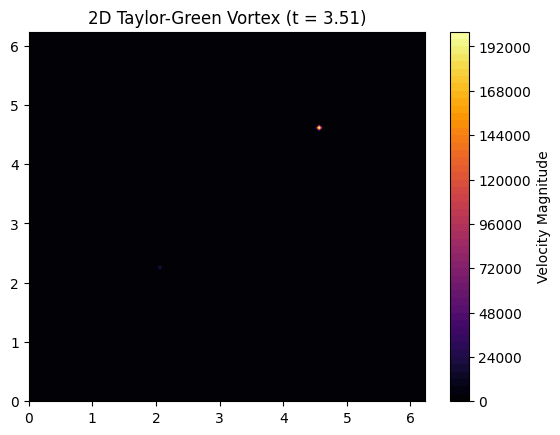

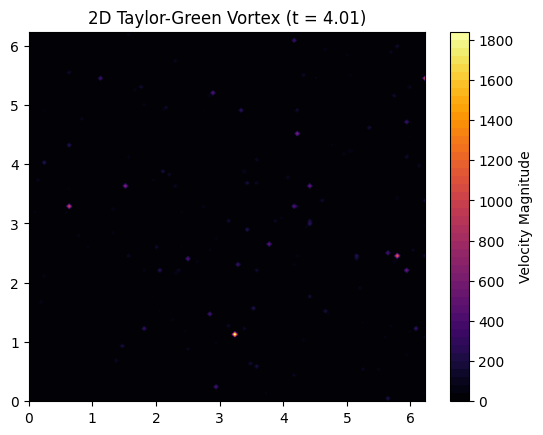

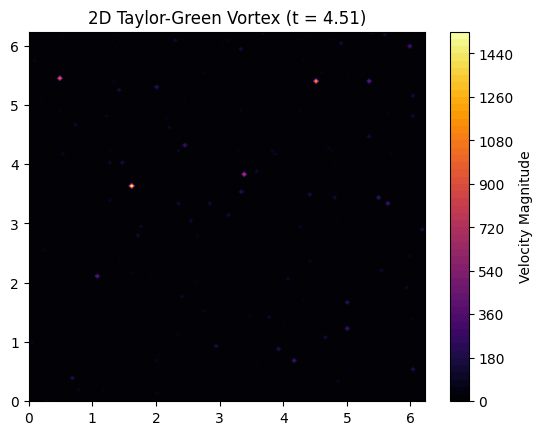

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15136\2231121364.py:36: RuntimeWarning: overflow encountered in multiply
  feq[:, :, i] = weights[i] * rho * (1 + 3 * cu + 4.5 * cu**2 - 1.5 * (u**2 + v**2))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15136\2231121364.py:52: RuntimeWarning: invalid value encountered in multiply
  u = np.sum(f_streamed * c[:, 0], axis=2) / rho
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15136\2231121364.py:52: RuntimeWarning: invalid value encountered in divide
  u = np.sum(f_streamed * c[:, 0], axis=2) / rho
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15136\2231121364.py:53: RuntimeWarning: invalid value encountered in multiply
  v = np.sum(f_streamed * c[:, 1], axis=2) / rho
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15136\2231121364.py:53: RuntimeWarning: invalid value encountered in divide
  v = np.sum(f_streamed * c[:, 1], axis=2) / rho
e:\New_Software_Install\Lib\site-packages\numpy\_core\fromnumeric.py:86: Runti

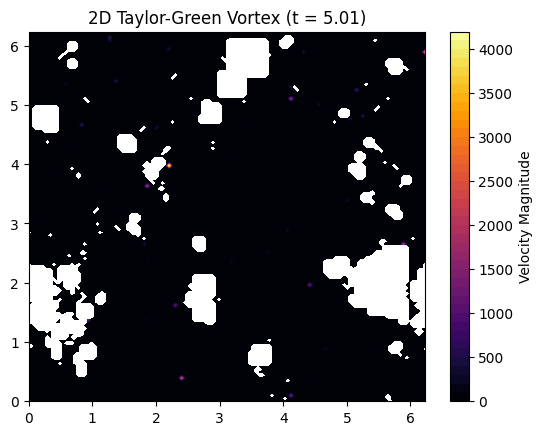

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# LBM parameters
Nx, Ny = 128, 128  # Grid resolution
L = 2 * np.pi      # Domain size
dx = L / Nx
dy = L / Ny
dt = 0.01          # Time step
tau = 1.0         # Relaxation time
nu = (tau - 0.5) * (dx**2) / dt  # Viscosity from tau
T_final = 5.0      # Final simulation time

# Lattice velocities for D2Q9
c_sqr = 1 / 3  # Speed of sound squared
c = np.array([[0, 0], [0, 1], [1, 1], [1, 0], [1, -1], 
              [0, -1], [-1, -1], [-1, 0], [-1, 1]])  # Lattice directions
weights = np.array([4/9] + [1/9]*4 + [1/36]*4)  # Lattice weights

# Initialize grid
x = np.linspace(0, L, Nx, endpoint=False)
y = np.linspace(0, L, Ny, endpoint=False)
X, Y = np.meshgrid(x, y, indexing="ij")

# Initial velocity field (Taylor-Green vortex)
U0 = 1.0  # Strength of the vortex
u = U0 * np.sin(X) * np.cos(Y)
v = -U0 * np.cos(X) * np.sin(Y)
rho = np.ones((Nx, Ny))  # Density

# Compute equilibrium distribution function
def equilibrium(rho, u, v):
    feq = np.zeros((Nx, Ny, 9))
    for i in range(9):
        cu = u * c[i, 0] + v * c[i, 1]
        feq[:, :, i] = weights[i] * rho * (1 + 3 * cu + 4.5 * cu**2 - 1.5 * (u**2 + v**2))
    return feq

# Initialize distribution function
f = equilibrium(rho, u, v)

# LBM Time Stepping Loop
t = 0
while t < T_final:
    # Streaming Step (Periodic BC)
    f_streamed = np.copy(f)
    for i in range(1, 9):
        f_streamed[:, :, i] = np.roll(f[:, :, i], shift=c[i], axis=(0, 1))

    # Compute macroscopic variables
    rho = np.sum(f_streamed, axis=2)
    u = np.sum(f_streamed * c[:, 0], axis=2) / rho
    v = np.sum(f_streamed * c[:, 1], axis=2) / rho

    # Collision step (BGK)
    feq = equilibrium(rho, u, v)
    f = f_streamed - (f_streamed - feq) / tau

    # Update time
    t += dt

    # Visualization every few steps
    if int(t / dt) % 50 == 0:
        plt.clf()
        plt.contourf(X, Y, np.sqrt(u**2 + v**2), levels=50, cmap="inferno")
        plt.colorbar(label="Velocity Magnitude")
        plt.title(f"2D Taylor-Green Vortex (t = {t:.2f})")
        plt.pause(0.1)

plt.show()
